# <p style = "padding:10px;color:green; margin:0;background-color:lightYellow ;font-family:verdana ; font-size:150% ; text-align:center ; border-radious:15px ,50px;overflow:hidder;font-weight:500"><b><u>Sentimental Analysis On Amazon Food Products</u></b></p>


# <p style = "padding:10px;color:blue; margin:0;background-color:#e5e7e9 ;font-family:verdana ; font-size:150% ; text-align:center ; border-radious:15px ,50px;overflow:hidder;font-weight:500"><b><u>Information</u></b></p>


 **Here i am doing some sentiment analysis on food products using python three different techniques:**
 
1. VADER (Valence Aware Dictionary and Sentiment Reasoner) 
2. TextBlob(TextBlob is a simple library which supports complex analysis and operations on textual data)
3. Roberta Pretrained Model from Hugging Face.

# <p style = "padding:10px;color:blue; margin:0;background-color:#e5e7e9 ;font-family:verdana ; font-size:150% ; text-align:center ; border-radious:15px ,50px;overflow:hidder;font-weight:500"><b><u>Import Libraries</u></b></p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

plt.style.use('seaborn')

import nltk

# <p style = "padding:10px;color:blue; margin:0;background-color:#e5e7e9 ;font-family:verdana ; font-size:150% ; text-align:center ; border-radious:15px ,50px;overflow:hidder;font-weight:500"><b><u>Loading Dataset</u></b></p>


In [2]:
# Read in data
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
print(df.shape)
df = df.head(1000)
print(df.shape)

(568454, 10)
(1000, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# <p style = "padding:10px;color:blue; margin:0;background-color:#e5e7e9 ;font-family:verdana ; font-size:150% ; text-align:center ; border-radious:15px ,50px;overflow:hidder;font-weight:500"><b><u>Quick EDA</u></b></p>


In [5]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
            
        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

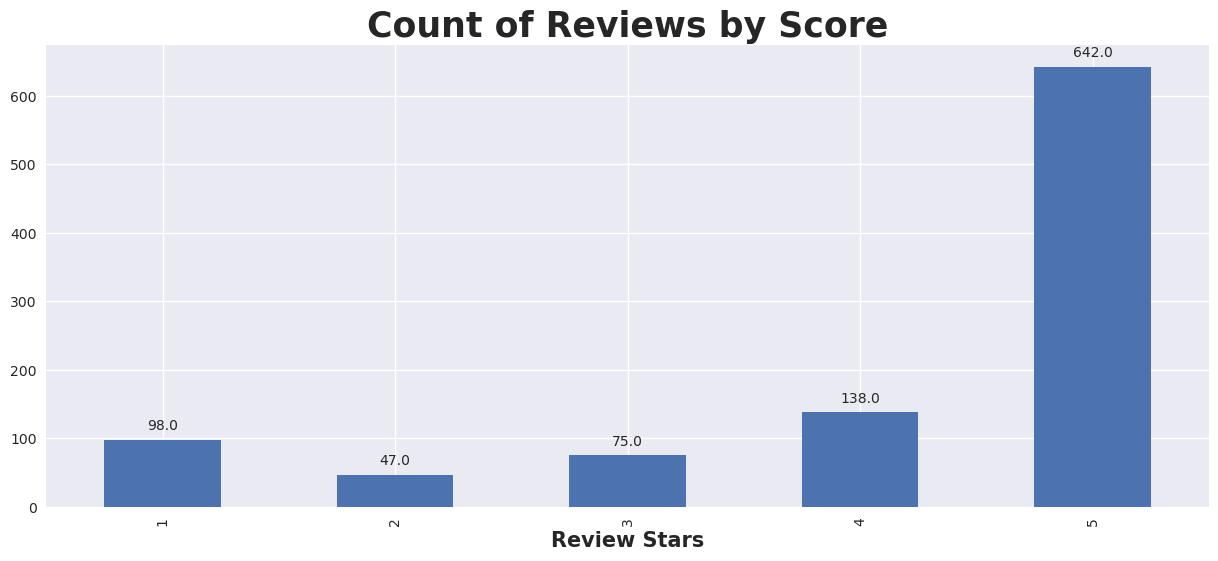

In [6]:
ax = df['Score'].value_counts().sort_index() .plot(kind='bar',figsize=(15, 6))
ax.set_xlabel('Review Stars',fontsize=15,fontweight='bold')
ax.set_title('Count of Reviews by Score',fontsize=25,fontweight='bold')
add_value_labels(ax)
plt.show()

# <p style = "padding:10px;color:blue; margin:0;background-color:#e5e7e9 ;font-family:verdana ; font-size:150% ; text-align:center ; border-radious:15px ,50px;overflow:hidder;font-weight:500"><b><u>Basic Nltk</u></b></p>


In [7]:
# Select any one Tweet 
# example = df['Text'].values[0]
example = df['Text'][30]
print(example)

I have never been a huge coffee fan. However, my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products, too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)


In [10]:
# Tokenization 
tokens = nltk.word_tokenize(example)
tokens[:15]

['I',
 'have',
 'never',
 'been',
 'a',
 'huge',
 'coffee',
 'fan',
 '.',
 'However',
 ',',
 'my',
 'mother',
 'purchased',
 'this']

In [11]:
# Part Of speech Tagging.
tagged = nltk.pos_tag(tokens)
tagged[:15]

[('I', 'PRP'),
 ('have', 'VBP'),
 ('never', 'RB'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('huge', 'JJ'),
 ('coffee', 'NN'),
 ('fan', 'NN'),
 ('.', '.'),
 ('However', 'RB'),
 (',', ','),
 ('my', 'PRP$'),
 ('mother', 'NN'),
 ('purchased', 'VBD'),
 ('this', 'DT')]

In [12]:
# To chunk the given list of tokens , so it takes tokens and actually will group them into chunks of text.
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  have/VBP
  never/RB
  been/VBN
  a/DT
  huge/JJ
  coffee/NN
  fan/NN
  ./.
  However/RB
  ,/,
  my/PRP$
  mother/NN
  purchased/VBD
  this/DT
  little/JJ
  machine/NN
  and/CC
  talked/VBD
  me/PRP
  into/IN
  trying/VBG
  the/DT
  (ORGANIZATION Latte/NNP Macciato/NNP)
  ./.
  (PERSON No/NNP Coffee/NNP Shop/NNP)
  has/VBZ
  a/DT
  better/JJR
  one/CD
  and/CC
  I/PRP
  like/VBP
  most/JJS
  of/IN
  the/DT
  other/JJ
  products/NNS
  ,/,
  too/RB
  (/(
  as/IN
  a/DT
  usually/RB
  non-coffee/JJ
  drinker/NN
  !/.
  )/)
  ./.
  </JJ
  br/NN
  //NNP
  >/VBZ
  The/DT
  little/JJ
  (PERSON Dolche/NNP Guesto/NNP Machine/NNP)
  is/VBZ
  super/JJ
  easy/JJ
  to/TO
  use/VB
  and/CC
  prepares/VBZ
  a/DT
  really/RB
  good/JJ
  Coffee/Latte/Cappuccino/etc/NNP
  in/IN
  less/JJR
  than/IN
  a/DT
  minute/NN
  (/(
  if/IN
  water/NN
  is/VBZ
  heated/VBN
  up/RP
  )/)
  ./.
  I/PRP
  would/MD
  recommend/VB
  the/DT
  (ORGANIZATION Dolce/NNP Gusto/NNP)
  to/TO
  anyone/NN
  ./.
  To

# <p style = "padding:10px;color:blue; margin:0;background-color:#e5e7e9 ;font-family:verdana ; font-size:150% ; text-align:center ; border-radious:15px ,50px;overflow:hidder;font-weight:500"><b><u>Sentimental Analysis</u></b></p>


# 1. VADER Seniment Scoring:

**We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.**

**This uses a "bag of words" approach:**
1. Stop words are removed
2. Each word is scored and combined to a total score.

          This approch will not account for relationships between words ,which in human speech is very important.

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [15]:
# let's Test our example text polarity score.
sia.polarity_scores(example)

{'neg': 0.041, 'neu': 0.692, 'pos': 0.267, 'compound': 0.9713}

In [16]:
# Run the polarity score on the entire dataset.
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    result[myid] = sia.polarity_scores(text)
result

  0%|          | 0/1000 [00:00<?, ?it/s]

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [17]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [18]:
# Now we have sentiment score and metadata.
# Let's check  sentimental score and Metadata head values once.
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [21]:
def vader_sntms(value):
    if value >= 0.05:
        return "Positive"
    elif value <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [22]:
x = vaders['compound'].apply(vader_sntms)
vaders.insert(5,'vader_sntms',x)

In [23]:
vaders.head()

,Id,neg,neu,pos,compound,vader_sntms,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,Positive,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,Negative,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,Positive,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,Neutral,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,Positive,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


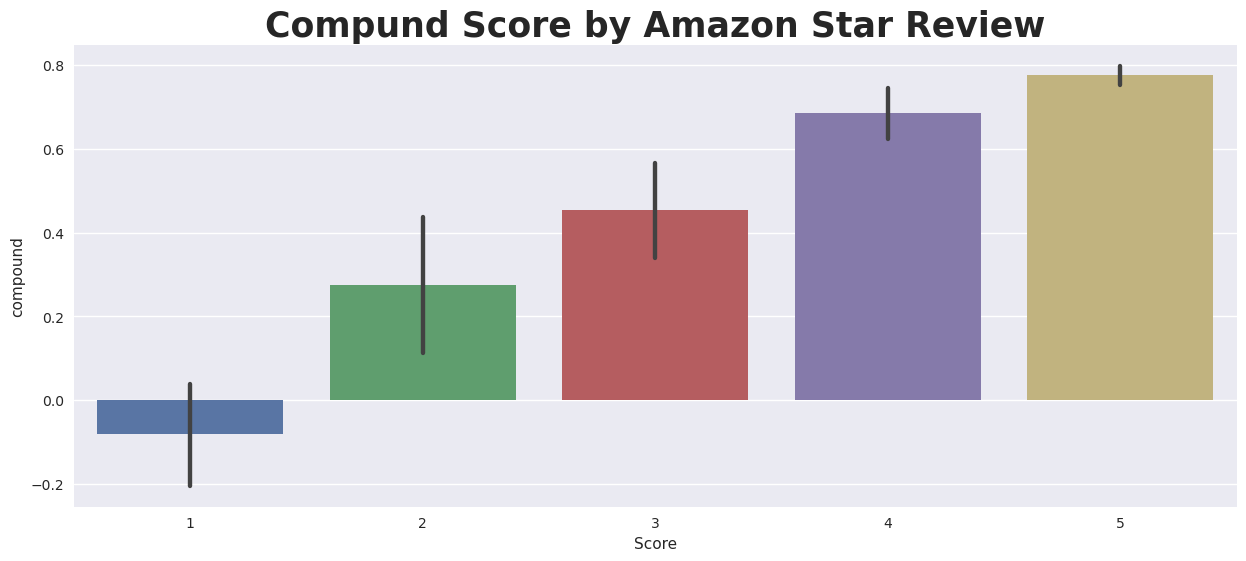

In [25]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review',fontsize=25,fontweight='bold')
plt.show()

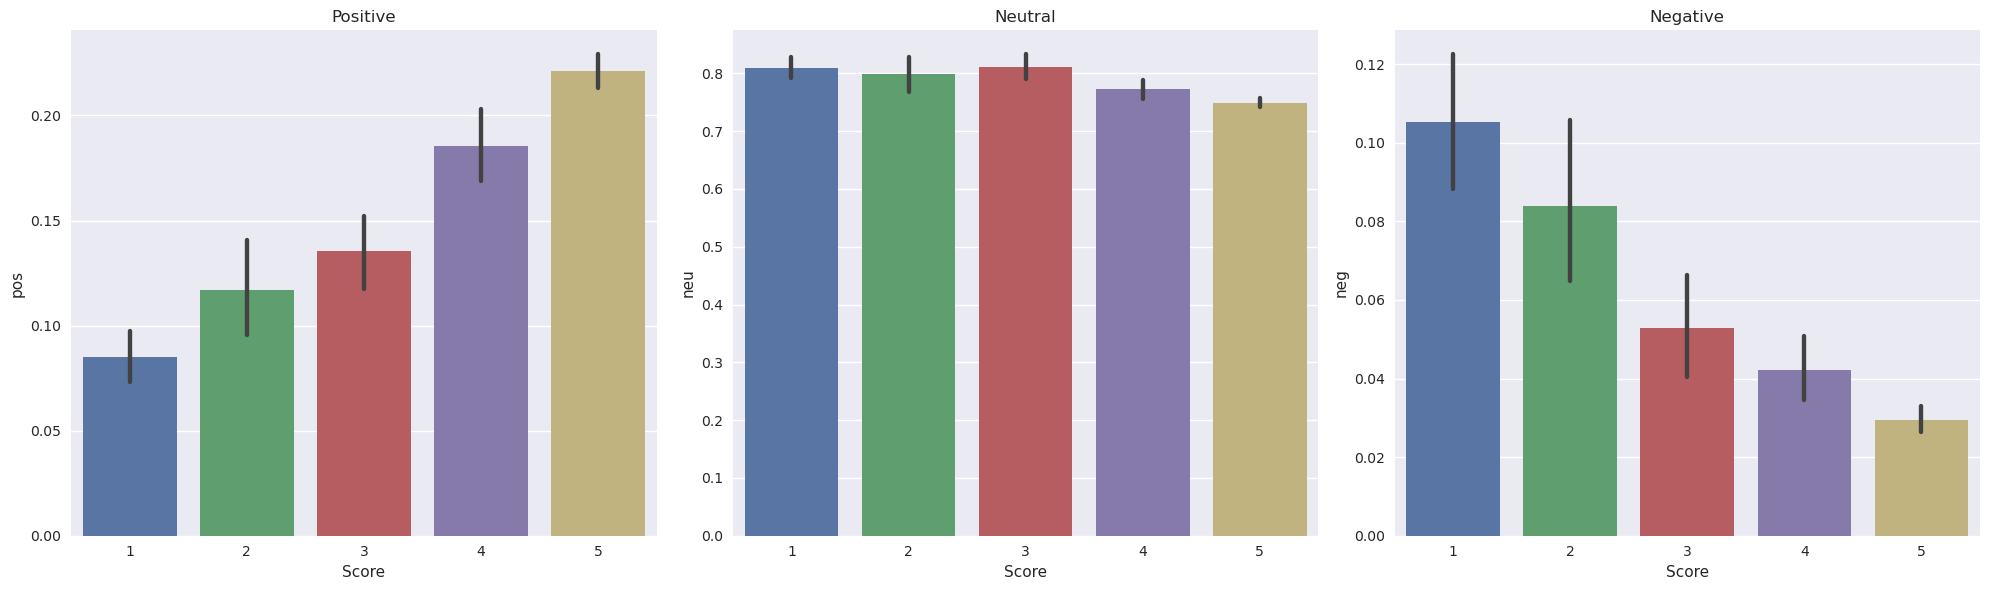

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

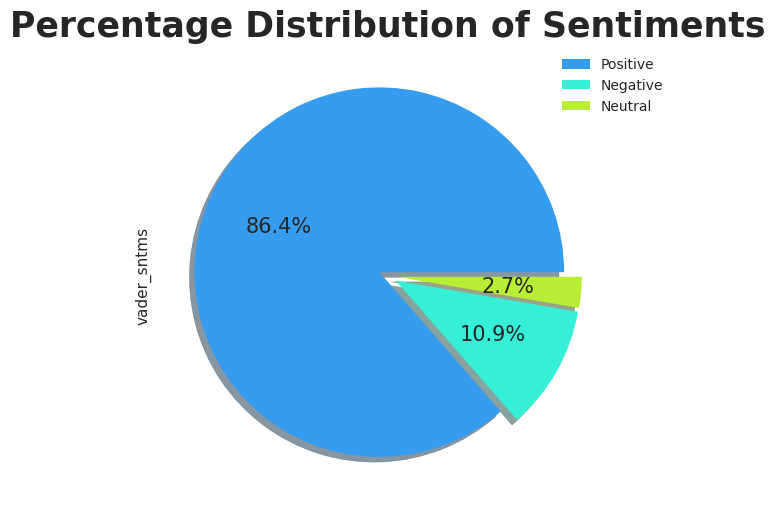

In [29]:
vaders['vader_sntms'].value_counts().plot.pie(explode=(0.05,0.05,0.05),colors=['#369cef','#36efd6','#b8ef36'],autopct='%1.1f%%',shadow=True,figsize=(15,6),fontsize=15,labels=None)
plt.title("Percentage Distribution of Sentiments",fontsize=25,fontweight='bold')
labels=vaders['vader_sntms'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

   **NOTE:**
   
      This model just looked at each word in the sentence or in the review and scored each word individually but like we mentioned before human language depends a lot on context , so if i say somthing a sentence that could have negative words actually colud be sarcastic or realted to other words in which way it makes it a positive statement.
      
      So this vader model wouldn't pick up on that sort of relationship between words but more and more recently these transformation based deep learning models have become very popular become they can pick up on that content.
      
      So we are going to use from hugging face which is one of the leaders in these type of models and gathering them easily avaliable,we are going to import transformers.

# Roberta Pretrained Model.

1. Use a model trained of a large corpus of data.
2. Transformer model accounts for the words but also the context related to other words.

**NOTE:**

          We are going to pull in a very specific model that has been pre-trained on a bunch of data for sentiment.
          
          This is provided by hugging face and when we run the auto tokenizer in the auto model sequence classification methods and load it from a pre-trained model , it will pull down the model weight that have been stored and this is we are essentially doing transfer learning.
          
          Actually , this model trained on a bunch of twitter comments that were labeled and we don't have to retrain the model at all , we can just use these trained weights and apply it to our dataset.
          
[Link of Roberta Pretrained Model](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment)

In [30]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [31]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [33]:
# VADER results on example
print(example)
vader_example = sia.polarity_scores(example)
print("\n",vader_example)

I have never been a huge coffee fan. However, my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products, too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)

 {'neg': 0.041, 'neu': 0.692, 'pos': 0.267, 'compound': 0.9713}


In [34]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0024305142, 'roberta_neu': 0.01650813, 'roberta_pos': 0.98106146}


In [36]:
both = {**vader_example , **scores_dict}
both

{'neg': 0.041,
 'neu': 0.692,
 'pos': 0.267,
 'compound': 0.9713,
 'roberta_neg': 0.0024305142,
 'roberta_neu': 0.01650813,
 'roberta_pos': 0.98106146}

In [37]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict


In [38]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [39]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [40]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Compare Scores between models.

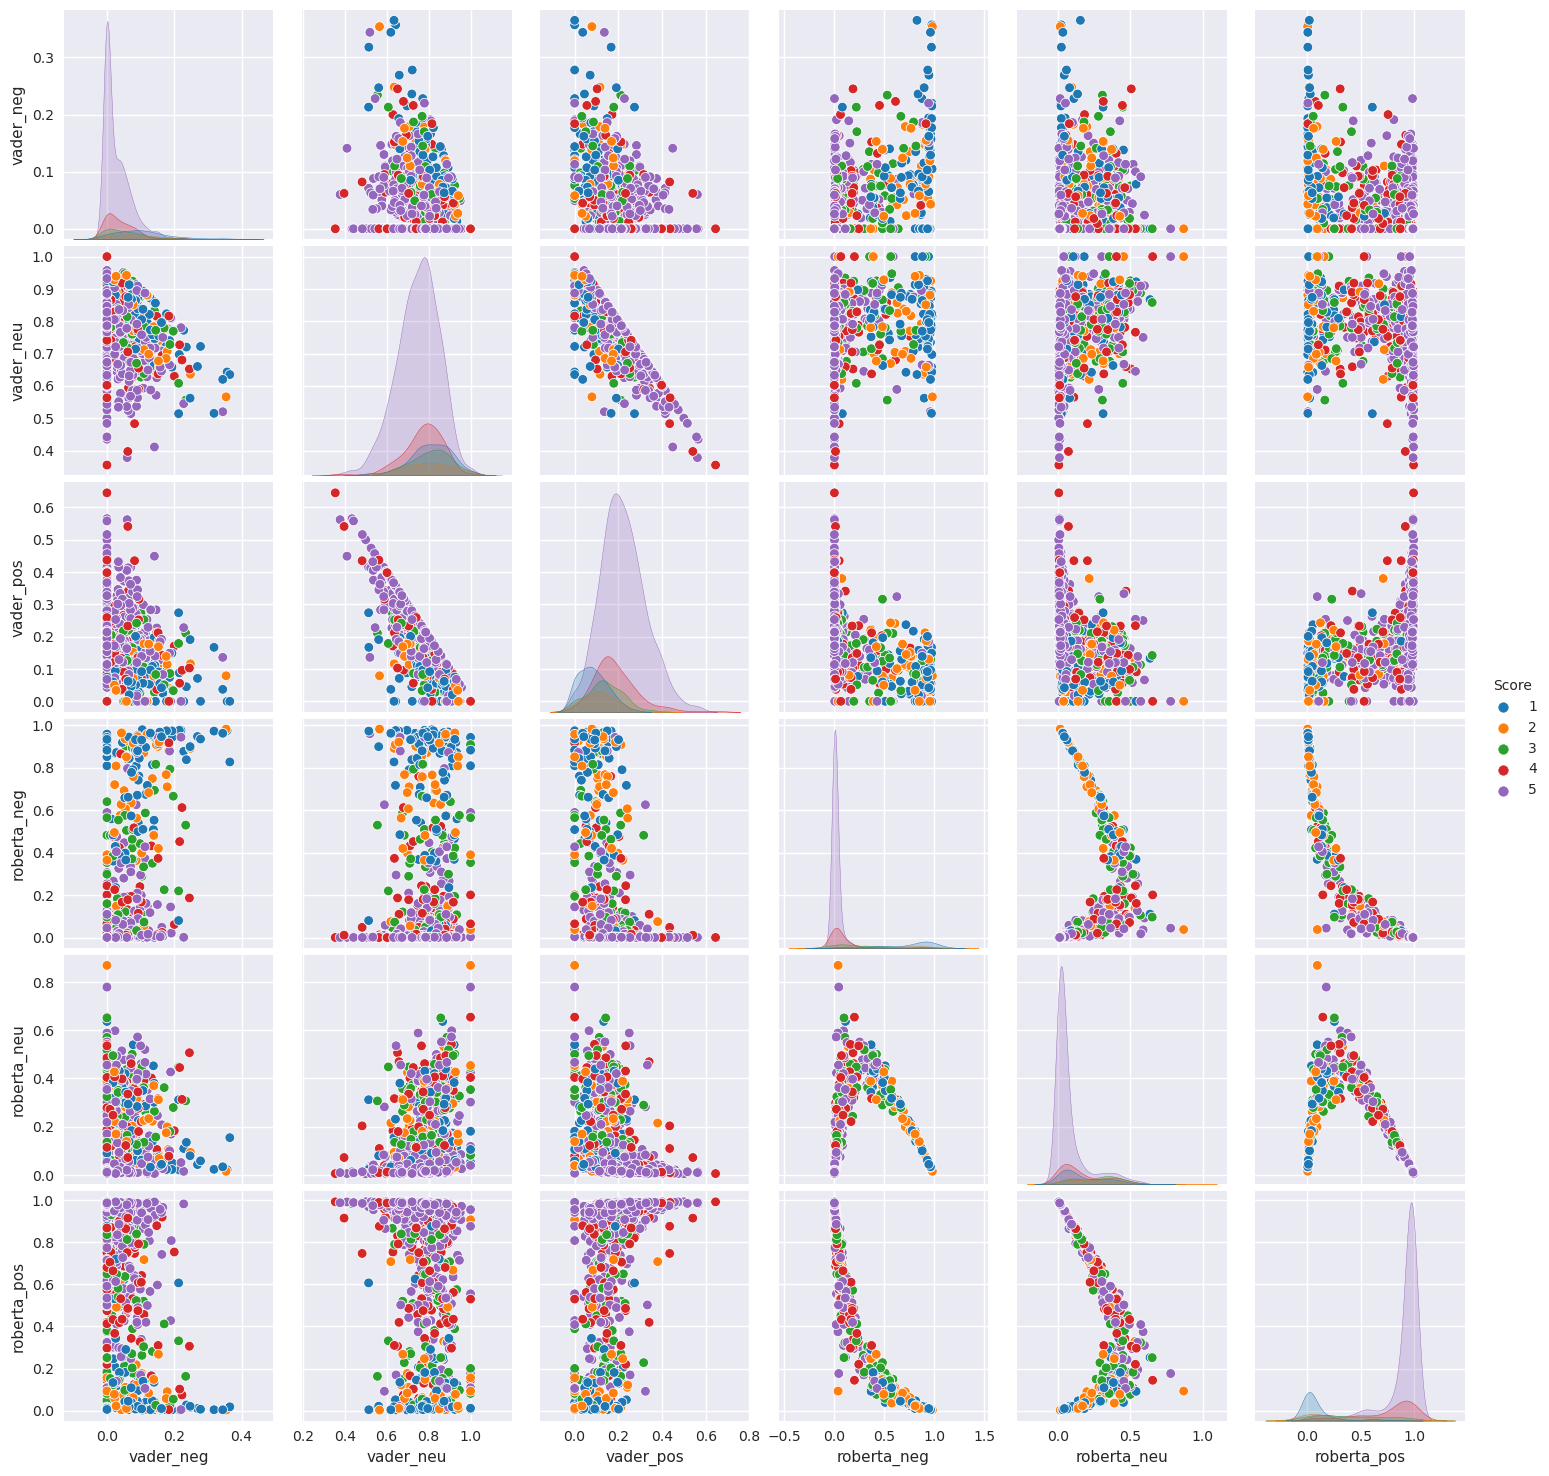

In [44]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

**Review Examples:**
1. Positive 1-Star and Negative 5-Star Reviews
2. Lets look at some examples where the model scoring and review score differ the most.

In [45]:
# Positive sentiment 1-Star view.
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [46]:
# Positive sentiment 1-Star view.
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [47]:
# nevative sentiment 5-Star view.
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [48]:
# nevative sentiment 5-Star view.
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# TextBlob.

**A high-level NLP library that provides sentiment analysis through a built-in sentiment property, which returns a named tuple of form (polarity, subjectivity), where polarity ranges from -1 to 1, with -1 being most negative and 1 being most positive.**

In [49]:
df1 = df
df1

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [50]:
from textblob import TextBlob

In [51]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [52]:
df1['sentiment_results'] = df1['Text'].apply(get_sentiment)
df1['sentiment_results'].head()

0    {'polarity': 0.45, 'subjectivity': 0.433333333...
1    {'polarity': -0.033333333333333326, 'subjectiv...
2    {'polarity': 0.1335714285714286, 'subjectivity...
3    {'polarity': 0.16666666666666666, 'subjectivit...
4    {'polarity': 0.48333333333333334, 'subjectivit...
Name: sentiment_results, dtype: object

In [53]:
df1 = df1.join(pd.json_normalize(df1['sentiment_results']))

In [54]:
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment_results,polarity,subjectivity,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"{'polarity': 0.45, 'subjectivity': 0.433333333...",0.450000,0.433333,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"{'polarity': -0.033333333333333326, 'subjectiv...",-0.033333,0.762963,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"{'polarity': 0.1335714285714286, 'subjectivity...",0.133571,0.448571,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"{'polarity': 0.16666666666666666, 'subjectivit...",0.166667,0.533333,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"{'polarity': 0.48333333333333334, 'subjectivit...",0.483333,0.637500,Positive


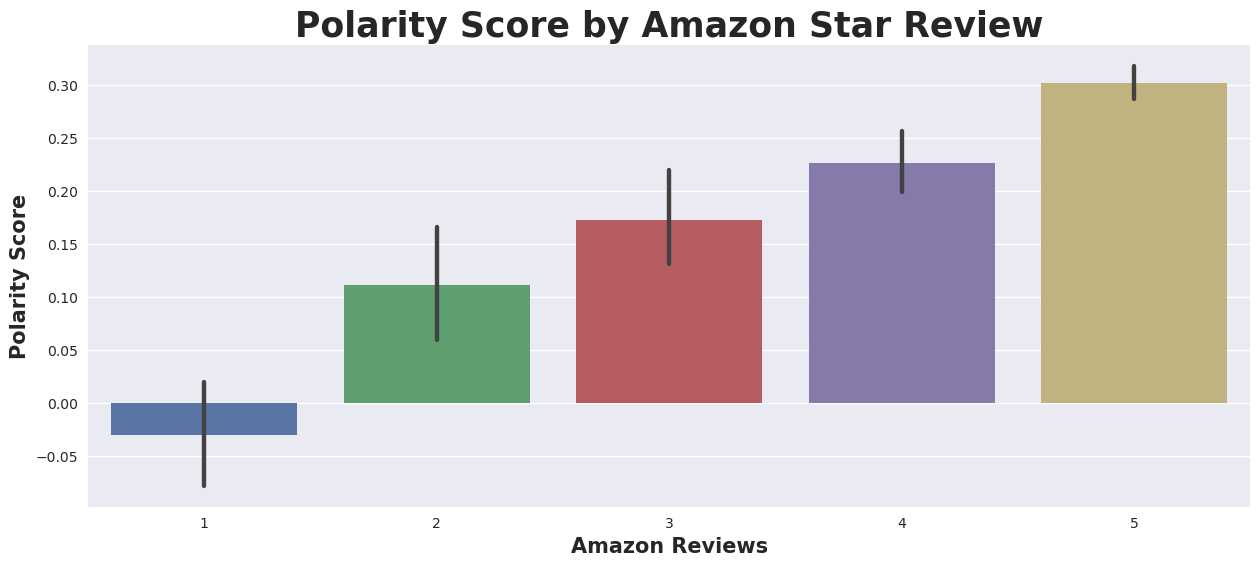

In [55]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df1, x='Score', y='polarity')
ax.set_title('Polarity Score by Amazon Star Review',fontsize=25,fontweight='bold')
ax.set_xlabel("Amazon Reviews",fontsize=15,fontweight='bold')
ax.set_ylabel("Polarity Score",fontsize=15,fontweight='bold')
plt.show()

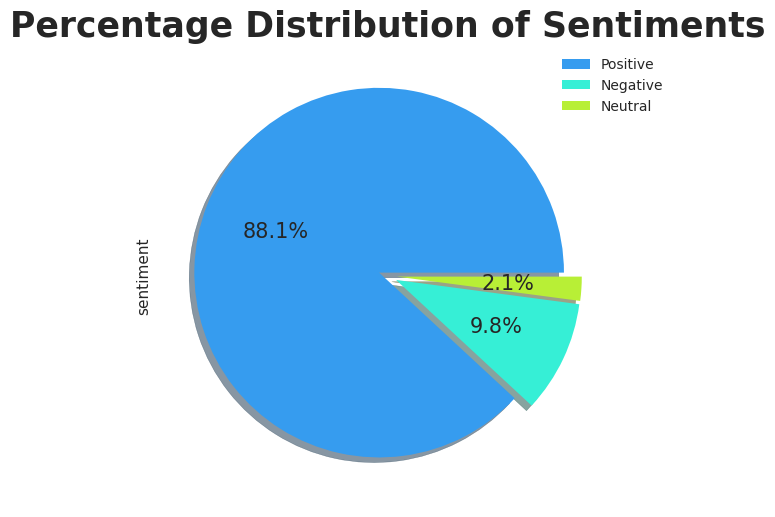

In [57]:
df1['sentiment'].value_counts().plot.pie(explode=(0.05,0.05,0.05),colors=['#369cef','#36efd6','#b8ef36'],autopct='%1.1f%%',shadow=True,figsize=(15,6),fontsize=15,labels=None)
plt.title("Percentage Distribution of Sentiments",fontsize=25,fontweight='bold')
labels=df1['sentiment'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

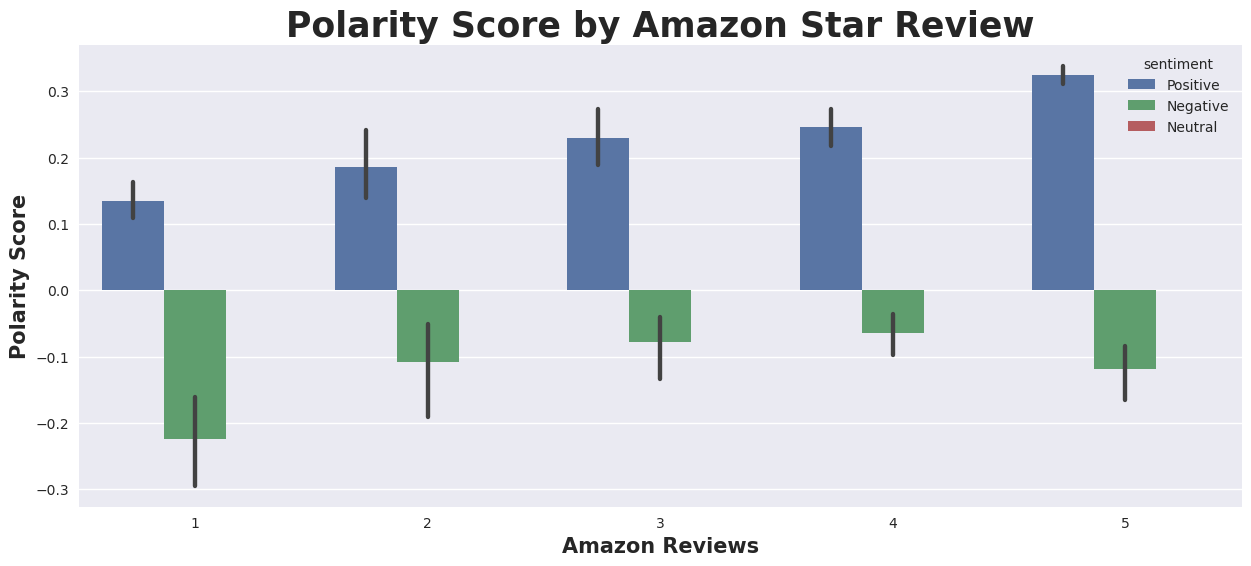

In [59]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df1, x='Score', y='polarity',hue='sentiment')
ax.set_title('Polarity Score by Amazon Star Review',fontsize=25,fontweight='bold')
ax.set_xlabel("Amazon Reviews",fontsize=15,fontweight='bold')
ax.set_ylabel("Polarity Score",fontsize=15,fontweight='bold')
plt.show()

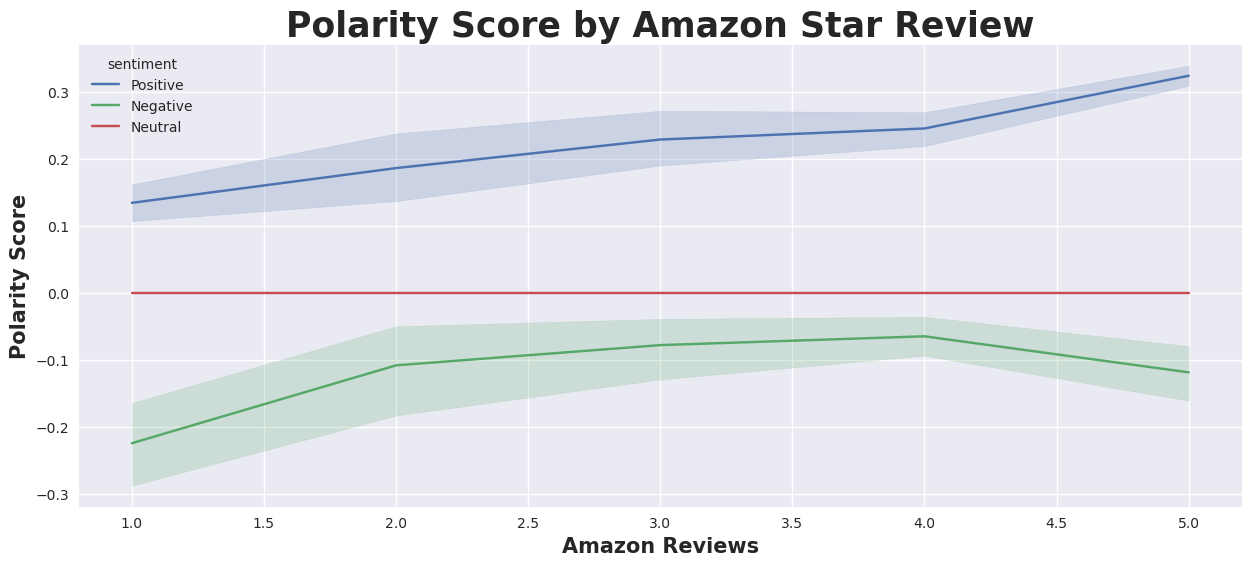

In [60]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=df1, x='Score', y='polarity',hue='sentiment')
ax.set_title('Polarity Score by Amazon Star Review',fontsize=25,fontweight='bold')
ax.set_xlabel("Amazon Reviews",fontsize=15,fontweight='bold')
ax.set_ylabel("Polarity Score",fontsize=15,fontweight='bold')
plt.show()

# HuggingFace's transformers library.

**This bellow code uses HuggingFace's pipeline method to set up a sentiment analysis pipeline, using a pre-trained transformer model from the library. The pipeline takes a list of reviews as input, and returns the sentiment for each review as output, with a label of "POSITIVE", "NEGATIVE", or "NEUTRAL".**

In [61]:
# using HuggingFace's transformers library to perform sentiment analysis on Netflix customer reviews:
import torch
from transformers import pipeline, set_seed

set_seed(42)

sentiment_pipeline = pipeline("sentiment-analysis")
reviews = [
    "I love this movie!", 
    "This movie is not good.", 
    "This movie is average.", 
    "I don't like this movie."
]

results = [sentiment_pipeline(review)[0]["label"] for review in reviews]
print(results)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

2023-02-18 17:29:18.808573: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-18 17:29:18.808697: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

['POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE']


In [65]:
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        result[myid] = sentiment_pipeline(text)
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 866


In [69]:
transformer_df1 = pd.DataFrame(result).T
transformer_df1.head()

,0
1,"{'label': 'POSITIVE', 'score': 0.9983851909637..."
2,"{'label': 'NEGATIVE', 'score': 0.9995254278182..."
3,"{'label': 'POSITIVE', 'score': 0.9997652173042..."
4,"{'label': 'POSITIVE', 'score': 0.9991534948348..."
5,"{'label': 'POSITIVE', 'score': 0.9987082481384..."


In [72]:
transformer_df1 = transformer_df1.join(pd.json_normalize(transformer_df1[0]))
transformer_df1.head()

,0,label,score
1,"{'label': 'POSITIVE', 'score': 0.9983851909637...",NEGATIVE,0.999525
2,"{'label': 'NEGATIVE', 'score': 0.9995254278182...",POSITIVE,0.999765
3,"{'label': 'POSITIVE', 'score': 0.9997652173042...",POSITIVE,0.999153
4,"{'label': 'POSITIVE', 'score': 0.9991534948348...",POSITIVE,0.998708
5,"{'label': 'POSITIVE', 'score': 0.9987082481384...",POSITIVE,0.999255


In [73]:
transformer_df1.drop(0,axis=1,inplace=True)

In [74]:
transformer_df1.head()

,label,score
1,NEGATIVE,0.999525
2,POSITIVE,0.999765
3,POSITIVE,0.999153
4,POSITIVE,0.998708
5,POSITIVE,0.999255


In [76]:
transformer_df1 = transformer_df1.reset_index().rename(columns={'index':'Id'})
transformer_df1.head()

,Id,label,score
0,1,NEGATIVE,0.999525
1,2,POSITIVE,0.999765
2,3,POSITIVE,0.999153
3,4,POSITIVE,0.998708
4,5,POSITIVE,0.999255


In [77]:
transformer_df1 = transformer_df1.merge(df,how='left')
transformer_df1.head()

,Id,label,score,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment_results
0,1,NEGATIVE,0.999525,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"{'polarity': 0.45, 'subjectivity': 0.433333333..."
1,2,POSITIVE,0.999765,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"{'polarity': -0.033333333333333326, 'subjectiv..."
2,3,POSITIVE,0.999153,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"{'polarity': 0.1335714285714286, 'subjectivity..."
3,4,POSITIVE,0.998708,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"{'polarity': 0.16666666666666666, 'subjectivit..."
4,5,POSITIVE,0.999255,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"{'polarity': 0.48333333333333334, 'subjectivit..."


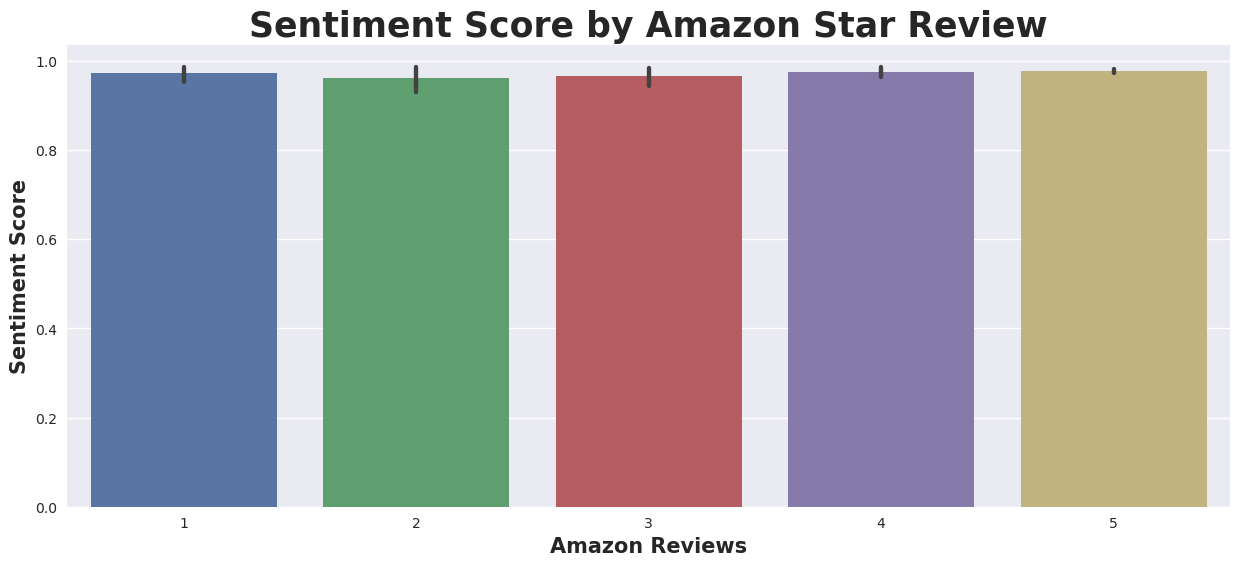

In [78]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=transformer_df1, x='Score', y='score')
ax.set_title('Sentiment Score by Amazon Star Review',fontsize=25,fontweight='bold')
ax.set_xlabel("Amazon Reviews",fontsize=15,fontweight='bold')
ax.set_ylabel("Sentiment Score",fontsize=15,fontweight='bold')
plt.show()

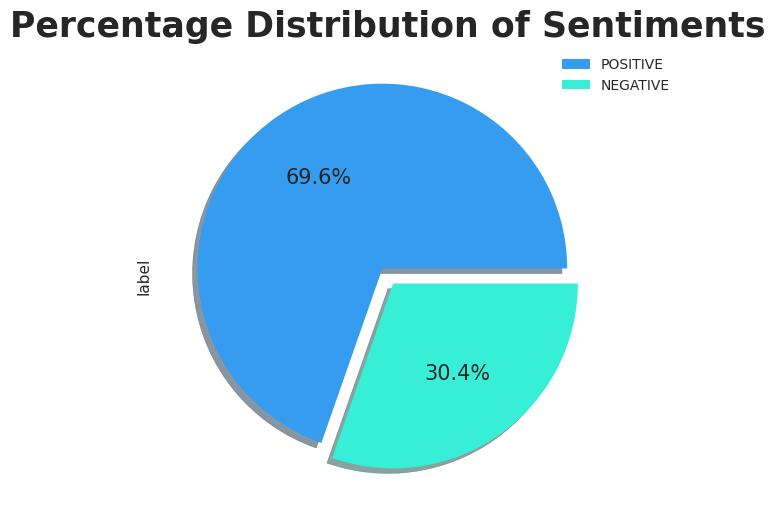

In [80]:
transformer_df1['label'].value_counts().plot.pie(explode=(0.05,0.05),colors=['#369cef','#36efd6'],autopct='%1.1f%%',shadow=True,figsize=(15,6),fontsize=15,labels=None)
plt.title("Percentage Distribution of Sentiments",fontsize=25,fontweight='bold')
labels=transformer_df1['label'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

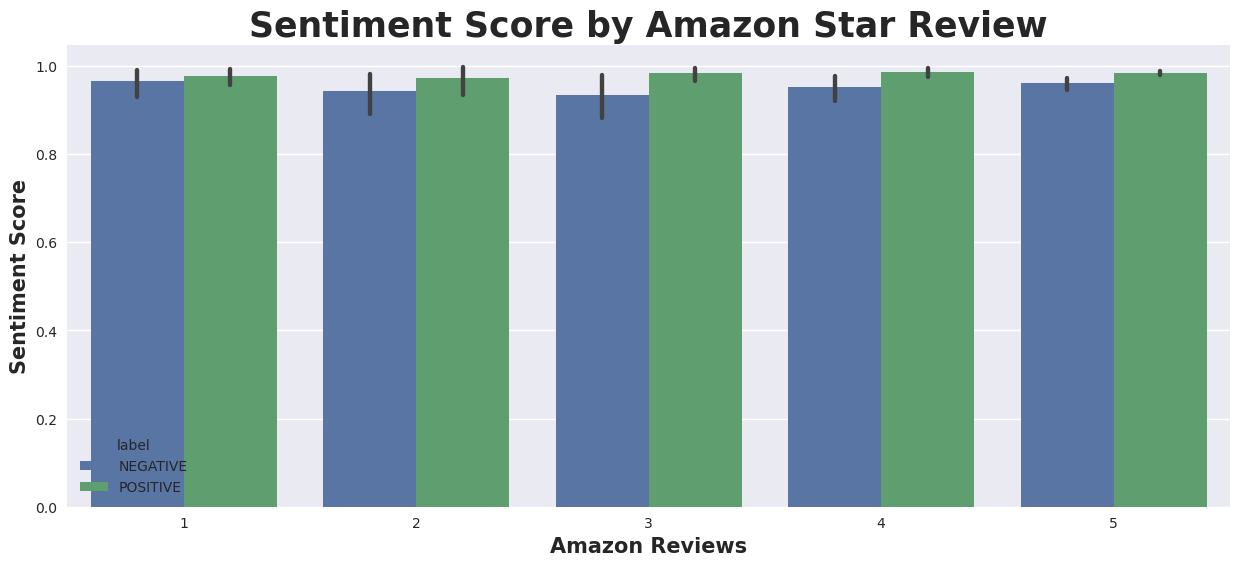

In [81]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=transformer_df1, x='Score', y='score',hue='label')
ax.set_title('Sentiment Score by Amazon Star Review',fontsize=25,fontweight='bold')
ax.set_xlabel("Amazon Reviews",fontsize=15,fontweight='bold')
ax.set_ylabel("Sentiment Score",fontsize=15,fontweight='bold')
plt.show()

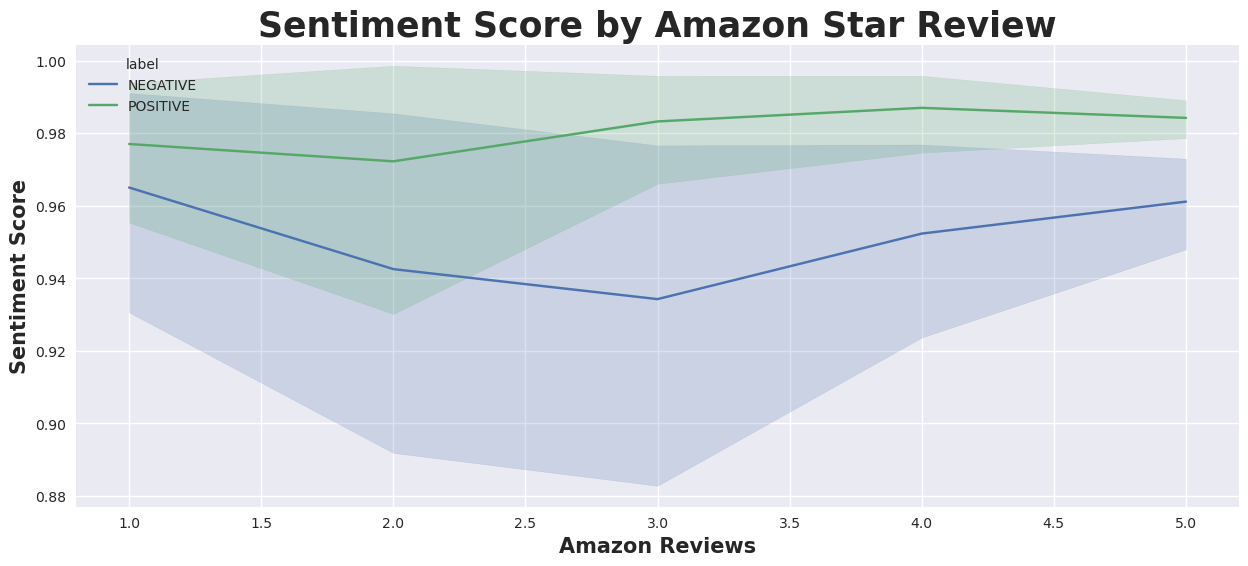

In [82]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=transformer_df1, x='Score', y='score',hue='label')
ax.set_title('Sentiment Score by Amazon Star Review',fontsize=25,fontweight='bold')
ax.set_xlabel("Amazon Reviews",fontsize=15,fontweight='bold')
ax.set_ylabel("Sentiment Score",fontsize=15,fontweight='bold')
plt.show()

# <p style = "padding:10px;color:white; margin:0;background-color:red ;font-family:verdana ; font-size:150% ; text-align:center ; border-radious:15px ,50px;overflow:hidder;font-weight:500"><b><u>Thank You</u></b></p>
